In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

df= pd.read_csv("house_sales_data.csv")
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Square_Footage         1000 non-null   int64  
 1   Bedrooms               1000 non-null   int64  
 2   Bathrooms              1000 non-null   float64
 3   Age                    1000 non-null   int64  
 4   Garage_Spaces          974 non-null    float64
 5   Lot_Size               974 non-null    float64
 6   Floors                 1000 non-null   int64  
 7   Neighborhood_Rating    1000 non-null   int64  
 8   Condition              1000 non-null   int64  
 9   School_Rating          968 non-null    float64
 10  Has_Pool               1000 non-null   int64  
 11  Renovated              1000 non-null   int64  
 12  Location_Type          1000 non-null   object 
 13  Distance_To_Center_KM  1000 non-null   float64
 14  Days_On_Market         972 non-null    float64
 15  Price

(1000, 17)

<Axes: >

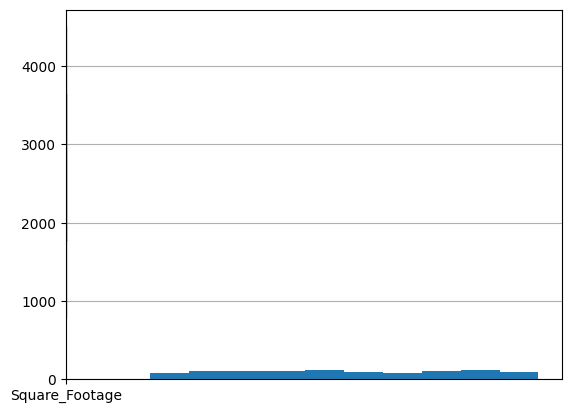

In [2]:
df['Square_Footage'].hist()
df.boxplot(column='Square_Footage')

<Axes: >

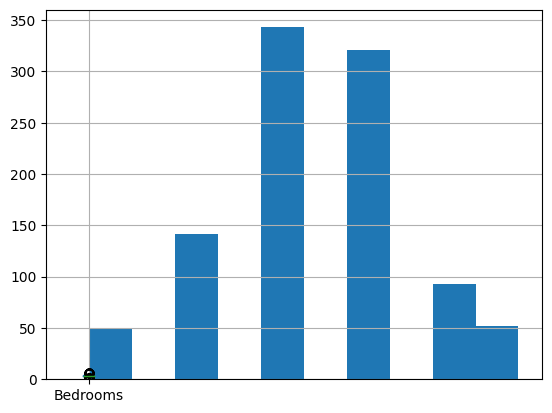

In [3]:
df['Bedrooms'].hist()
df.boxplot(column='Bedrooms')

<Axes: >

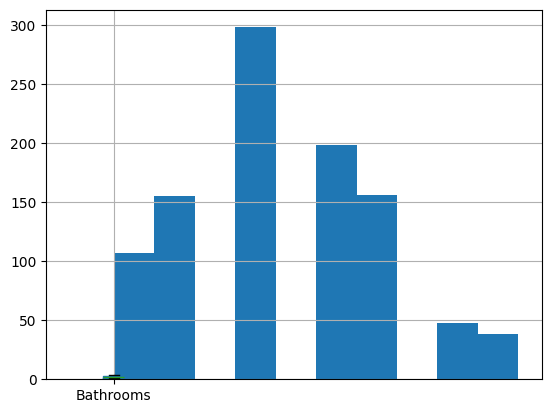

In [4]:
df['Bathrooms'].hist()
df.boxplot(column='Bathrooms')

<Axes: >

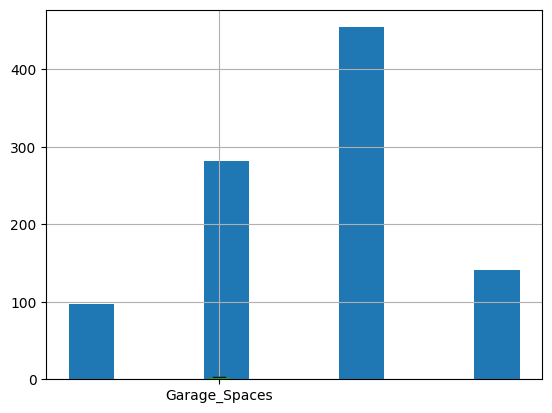

In [5]:
df['Garage_Spaces'].hist()
df.boxplot(column='Garage_Spaces')

<Axes: >

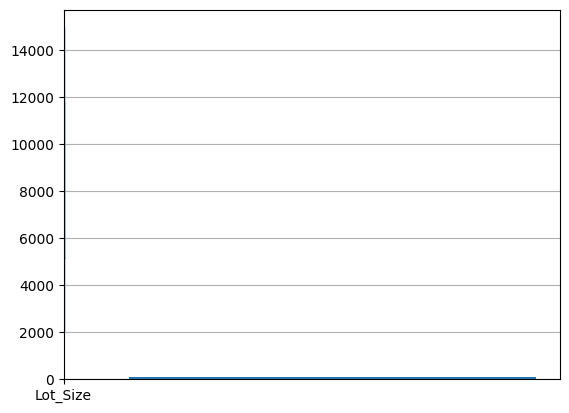

In [6]:
df['Lot_Size'].hist()
df.boxplot(column='Lot_Size')

<Axes: >

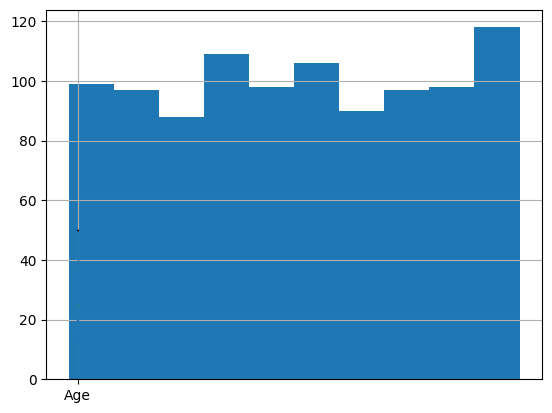

In [7]:
df['Age'].hist()
df.boxplot(column='Age')

<Axes: >

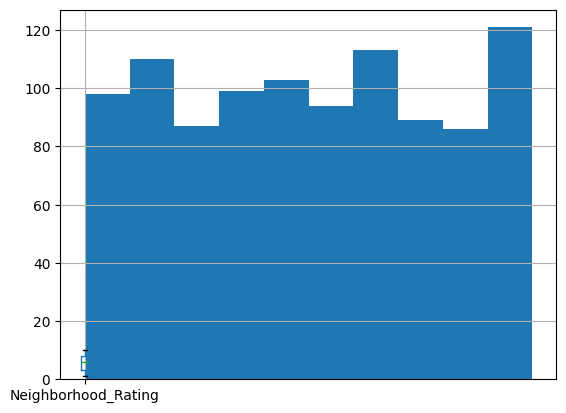

In [8]:
df['Neighborhood_Rating'].hist()
df.boxplot(column='Neighborhood_Rating')

<Axes: >

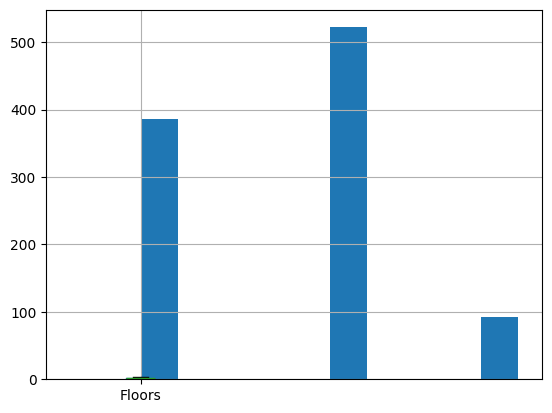

In [9]:
df['Floors'].hist()
df.boxplot(column='Floors')

<Axes: >

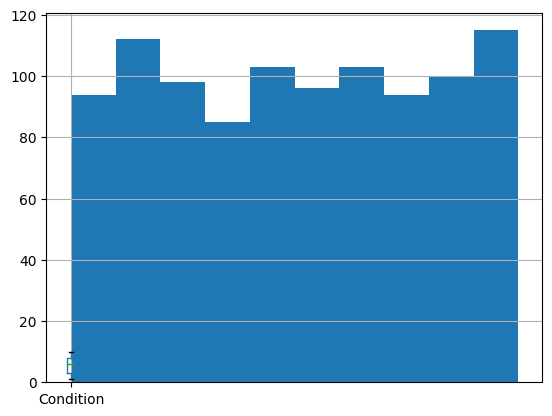

In [10]:
df['Condition'].hist()
df.boxplot(column='Condition')

<Axes: >

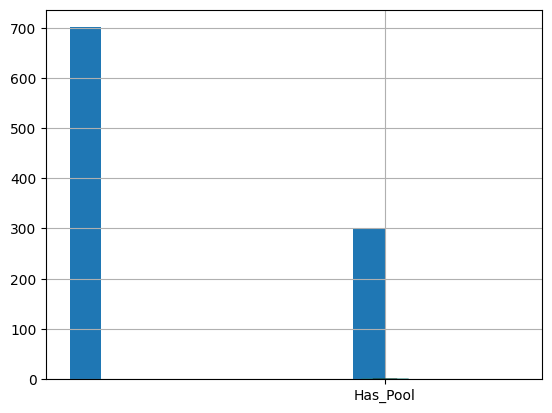

In [11]:
df['Has_Pool'].hist()
df.boxplot(column='Has_Pool')

<Axes: >

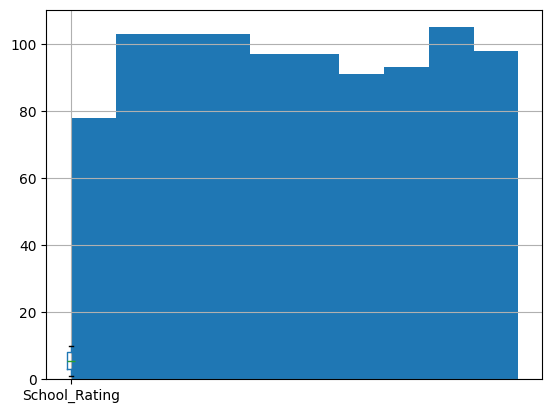

In [12]:
df['School_Rating'].hist()
df.boxplot(column='School_Rating')

<Axes: >

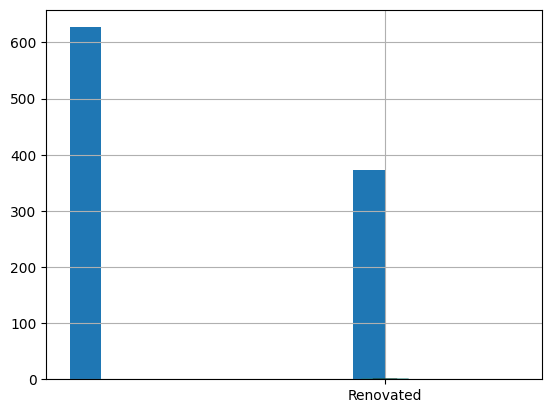

In [13]:
df['Renovated'].hist()
df.boxplot(column='Renovated')

<Axes: >

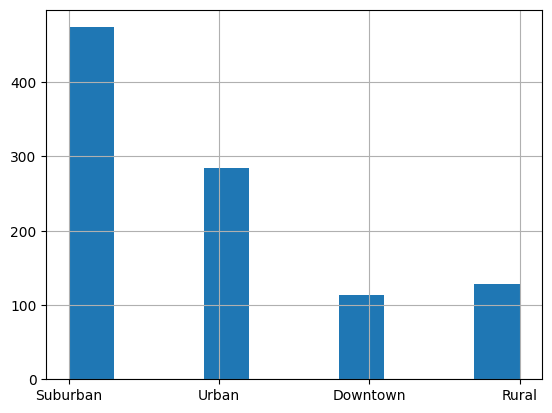

In [14]:
df['Location_Type'].hist()
# this is only for numeric columns
#df.boxplot(column='Location_Type')

<Axes: >

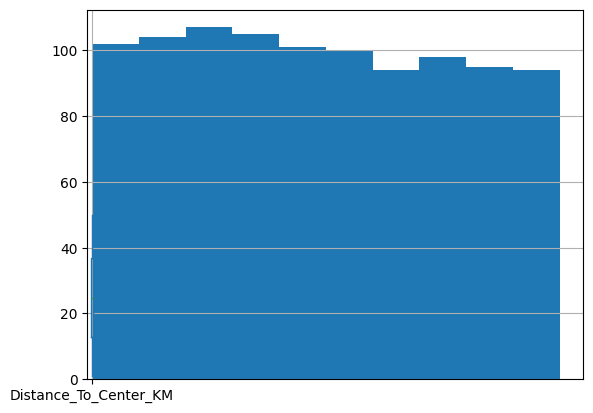

In [15]:
df['Distance_To_Center_KM'].hist()
df.boxplot(column='Distance_To_Center_KM')

<Axes: >

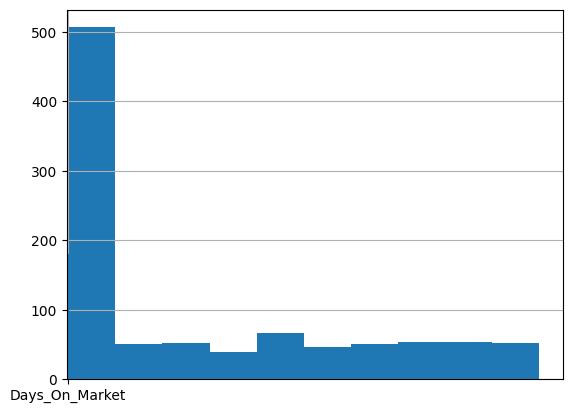

In [16]:
df['Days_On_Market'].hist()
df.boxplot(column='Days_On_Market')

In [17]:
median_value = df["Garage_Spaces"].median()
df["Garage_Spaces"] = df["Garage_Spaces"].fillna(median_value)
median_value = df["Lot_Size"].median()
df["Lot_Size"] = df["Lot_Size"].fillna(median_value)
median_value = df["Days_On_Market"].median()
df["Days_On_Market"] = df["Days_On_Market"].fillna(median_value)


In [18]:
median_value = df["School_Rating"].median()
df["School_Rating"] = df["School_Rating"].fillna(median_value)

In [19]:
df.info()
df.columns
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Square_Footage         1000 non-null   int64  
 1   Bedrooms               1000 non-null   int64  
 2   Bathrooms              1000 non-null   float64
 3   Age                    1000 non-null   int64  
 4   Garage_Spaces          1000 non-null   float64
 5   Lot_Size               1000 non-null   float64
 6   Floors                 1000 non-null   int64  
 7   Neighborhood_Rating    1000 non-null   int64  
 8   Condition              1000 non-null   int64  
 9   School_Rating          1000 non-null   float64
 10  Has_Pool               1000 non-null   int64  
 11  Renovated              1000 non-null   int64  
 12  Location_Type          1000 non-null   object 
 13  Distance_To_Center_KM  1000 non-null   float64
 14  Days_On_Market         1000 non-null   float64
 15  Price

(1000, 17)

In [20]:
pd.crosstab(df["Renovated"], df["Sold_Within_Week"], normalize="index")*100

Sold_Within_Week,0,1
Renovated,,
0,54.545455,45.454545
1,43.967828,56.032172


In [21]:
print(df["Location_Type"].unique())
df["Location_Type_Dec"] = df["Location_Type"].map({"Suburban": 1, "Urban": 2, "Rural": 3,"Downtown":4})
print(df["Location_Type_Dec"].unique())

['Suburban' 'Urban' 'Downtown' 'Rural']
[1 2 4 3]


In [22]:
pd.crosstab(df["Location_Type_Dec"], df["Sold_Within_Week"], normalize="index")*100

Sold_Within_Week,0,1
Location_Type_Dec,,
1,48.523207,51.476793
2,47.887324,52.112676
3,53.906250,46.093750
4,62.280702,37.719298


In [23]:
X=df.drop(columns=['Sold_Within_Week','Price'])
Y_Sold=df['Sold_Within_Week']
Y_Price=df['Price']
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Square_Footage         1000 non-null   int64  
 1   Bedrooms               1000 non-null   int64  
 2   Bathrooms              1000 non-null   float64
 3   Age                    1000 non-null   int64  
 4   Garage_Spaces          1000 non-null   float64
 5   Lot_Size               1000 non-null   float64
 6   Floors                 1000 non-null   int64  
 7   Neighborhood_Rating    1000 non-null   int64  
 8   Condition              1000 non-null   int64  
 9   School_Rating          1000 non-null   float64
 10  Has_Pool               1000 non-null   int64  
 11  Renovated              1000 non-null   int64  
 12  Location_Type          1000 non-null   object 
 13  Distance_To_Center_KM  1000 non-null   float64
 14  Days_On_Market         1000 non-null   float64
 15  Locat

In [24]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
    X,
    Y_Price,
    test_size=0.2,
    random_state=42
)
print(y_train_price.info())


<class 'pandas.core.series.Series'>
Index: 800 entries, 29 to 102
Series name: Price
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB
None


In [25]:
X_train_sold, X_test_sold, y_train_sold, y_test_sold = train_test_split(
    X,
    Y_Sold,
    test_size=0.2,
    random_state=42
)
print(y_train_sold.info())

<class 'pandas.core.series.Series'>
Index: 800 entries, 29 to 102
Series name: Sold_Within_Week
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB
None


In [26]:
X_train_price = X_train_price[[
    'Square_Footage',
    'Bedrooms',
    'Bathrooms',
    'Age',
    'Garage_Spaces',
    'Lot_Size',
    'Floors',
    'Neighborhood_Rating',
    'Condition',
    'School_Rating',
    'Has_Pool',
    'Renovated',
    'Location_Type_Dec',
    'Distance_To_Center_KM',
    'Days_On_Market'
    
]]
model_price = LinearRegression()
model_price.fit(X_train_price,y_train_price)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
X_train_sold = X_train_sold[[
    'Square_Footage',
    'Bedrooms',
    'Bathrooms',
    'Age',
    'Garage_Spaces',
    'Lot_Size',
    'Floors',
    'Neighborhood_Rating',
    'Condition',
    'School_Rating',
    'Has_Pool',
    'Renovated',
    'Location_Type_Dec',
    'Distance_To_Center_KM',
    'Days_On_Market'
    
]]
model_sold = LogisticRegression()
model_sold.fit(X_train_sold,y_train_sold)

c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [28]:
new_data = pd.DataFrame([{
    'Square_Footage': 2500,
    'Bedrooms': 4,
    'Bathrooms': 3,
    'Age': 10,
    'Garage_Spaces': 2,
    'Lot_Size': 15899,
    'Floors': 2,
    'Neighborhood_Rating': 4,
    'Condition':1,
    'School_Rating':4,
    'Has_Pool':1,
    'Renovated':1,
    'Location_Type_Dec':3,
    'Distance_To_Center_KM':4,
    'Days_On_Market':30 
}])
prediction = model_price.predict(new_data)
print("Home price:", prediction)

Home price: [802687.62976241]


In [29]:
prediction = model_sold.predict(new_data)
print("Sold within week:", prediction)

Sold within week: [0]


In [30]:
import joblib

# Save the model
joblib.dump(model_price, "iris_rf_model_house_price.pkl")
joblib.dump(model_sold, "iris_rf_model_house_sold.pkl")
print("Model price and sold saved successfully!")

Model price and sold saved successfully!
